In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
df= pd.read_csv('Datos_limpios.csv')

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21528 entries, 0 to 21527
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   21528 non-null  int64  
 1   last_scraped                 21528 non-null  object 
 2   name                         21528 non-null  object 
 3   description                  21528 non-null  object 
 4   neighborhood_overview        21528 non-null  object 
 5   host_location                21528 non-null  object 
 6   host_response_time           21528 non-null  object 
 7   host_is_superhost            21528 non-null  object 
 8   host_verifications           21528 non-null  object 
 9   host_has_profile_pic         21528 non-null  object 
 10  host_identity_verified       21528 non-null  object 
 11  neighbourhood                21528 non-null  object 
 12  property_type                21528 non-null  object 
 13  room_type       

In [79]:
columnas_a_conservar = [
    "price", "room_type", "review_scores_cleanliness", "host_acceptance_rate",
    "host_identity_verified", "host_is_superhost", "instant_bookable",
    "accommodates", "bathrooms", "property_type"
]

# Filtrar DataFrame para mantener solo esas columnas
df = df[columnas_a_conservar]

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21528 entries, 0 to 21527
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   price                      21528 non-null  object 
 1   room_type                  21528 non-null  object 
 2   review_scores_cleanliness  21528 non-null  float64
 3   host_acceptance_rate       21528 non-null  float64
 4   host_identity_verified     21528 non-null  object 
 5   host_is_superhost          21528 non-null  object 
 6   instant_bookable           21528 non-null  object 
 7   accommodates               21528 non-null  float64
 8   bathrooms                  21528 non-null  float64
 9   property_type              21528 non-null  object 
dtypes: float64(4), object(6)
memory usage: 1.6+ MB


In [81]:
df=df
df['room_type'] = df['room_type'].map({
    'Entire home/apt': 1,
    'Private room': 2,
    'Shared room': 3,
    'Hotel room': 4
})


In [82]:
import re
df['price']= df['price'].apply(lambda x: float(re.sub(r'[^0-9.]', '', x)) if re.search(r'\d', x) else None)

In [83]:
sorted_values = df['price'].sort_values(ascending=True)
sorted_values

11505       100.0
12190       100.0
12191       100.0
8630        100.0
12195       100.0
           ...   
15431     39899.0
7187      41800.0
5305      62000.0
19948     74580.0
12962    100000.0
Name: price, Length: 21528, dtype: float64

In [84]:
df = df[df['price'] <40000]

In [85]:
df1 = df[df["room_type"] ==2]

In [86]:

Y= df1['price']
X1= df1['room_type'].to_frame()

In [87]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [88]:
type(model)

sklearn.linear_model._base.LinearRegression

In [89]:
model.fit(X=X1, y=Y)

LinearRegression()

In [90]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['room_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.]),
 'rank_': 0,
 'singular_': array([0.]),
 'intercept_': np.float64(480.01436934539646)}

In [91]:

y_pred= model.predict(X=X1)
y_pred

array([480.01436935, 480.01436935, 480.01436935, ..., 480.01436935,
       480.01436935, 480.01436935], shape=(1879,))

<Axes: xlabel='room_type', ylabel='price'>

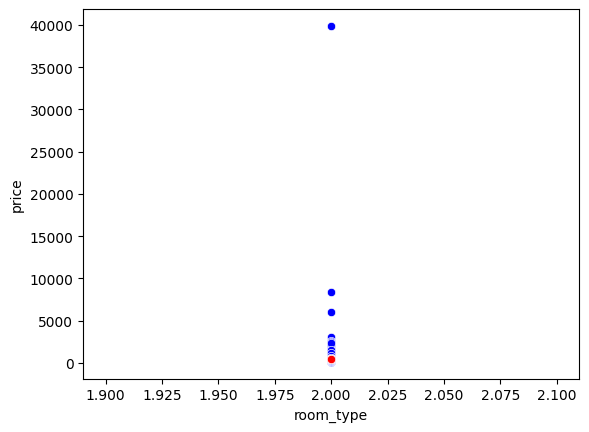

In [92]:
sns.scatterplot(x='room_type', y='price', color="blue", data=df1)
sns.scatterplot(x='room_type', y=y_pred, color="red", data=df1)

In [93]:
coef_Deter= model.score(X=X1, y=Y)
coef_Deter

0.0

In [94]:
coef_Correl= np.sqrt(coef_Deter)
coef_Correl

np.float64(0.0)

In [95]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1879 entries, 6 to 21526
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   price                      1879 non-null   float64
 1   room_type                  1879 non-null   int64  
 2   review_scores_cleanliness  1879 non-null   float64
 3   host_acceptance_rate       1879 non-null   float64
 4   host_identity_verified     1879 non-null   object 
 5   host_is_superhost          1879 non-null   object 
 6   instant_bookable           1879 non-null   object 
 7   accommodates               1879 non-null   float64
 8   bathrooms                  1879 non-null   float64
 9   property_type              1879 non-null   object 
dtypes: float64(5), int64(1), object(4)
memory usage: 161.5+ KB


In [96]:

Y2= df1['price']
X2= df1['host_acceptance_rate'].to_frame()

In [97]:
from sklearn.linear_model import LinearRegression
model2= LinearRegression()
type(model2)

sklearn.linear_model._base.LinearRegression

In [98]:
model2.fit(X=X2, y=Y2)

LinearRegression()

In [99]:
model2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.57238342]),
 'rank_': 1,
 'singular_': array([1223.45113474]),
 'intercept_': np.float64(520.7851885442468)}

In [100]:
y_pred2= model2.predict(X=X2)
y_pred2

array([463.54684658, 482.43549943, 469.27068077, ..., 482.43549943,
       482.43549943, 482.43549943], shape=(1879,))

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

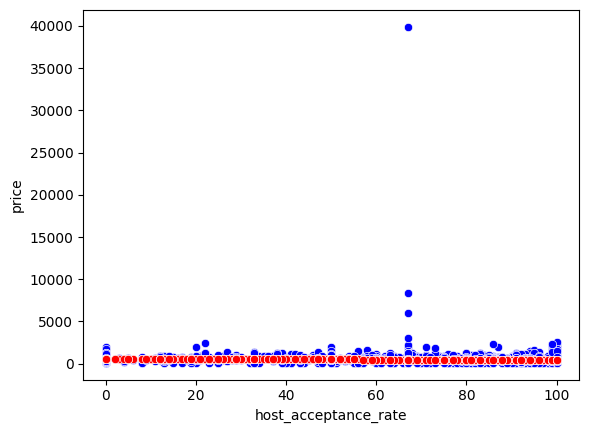

In [101]:
sns.scatterplot(x='host_acceptance_rate', y='price', color="blue", data=df1)
sns.scatterplot(x='host_acceptance_rate', y=y_pred2, color="red", data=df1)

In [102]:
coef_Deter2= model2.score(X=X2, y=Y2)
coef_Deter2

0.00025550394753182104

In [103]:
coef_Correl2= np.sqrt(coef_Deter2)
coef_Correl2

np.float64(0.015984490843684106)

In [104]:
df1['host_is_superhost'] = df1['host_is_superhost'].replace({'f': 0, 't': 1})

C:\Users\blanf\AppData\Local\Temp\ipykernel_34184\4038004741.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['host_is_superhost'] = df1['host_is_superhost'].replace({'f': 0, 't': 1})
C:\Users\blanf\AppData\Local\Temp\ipykernel_34184\4038004741.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['host_is_superhost'] = df1['host_is_superhost'].replace({'f': 0, 't': 1})


In [105]:

Y3= df1['price']
X3= df1['host_is_superhost'].to_frame()

In [106]:
from sklearn.linear_model import LinearRegression
model3= LinearRegression()
type(model3)

sklearn.linear_model._base.LinearRegression

In [107]:
model3.fit(X=X3, y=Y3)

LinearRegression()

In [108]:
y_pred3= model3.predict(X=X3)
y_pred3

array([478.87420043, 480.39361702, 478.87420043, ..., 480.39361702,
       480.39361702, 480.39361702], shape=(1879,))

<Axes: xlabel='host_is_superhost', ylabel='price'>

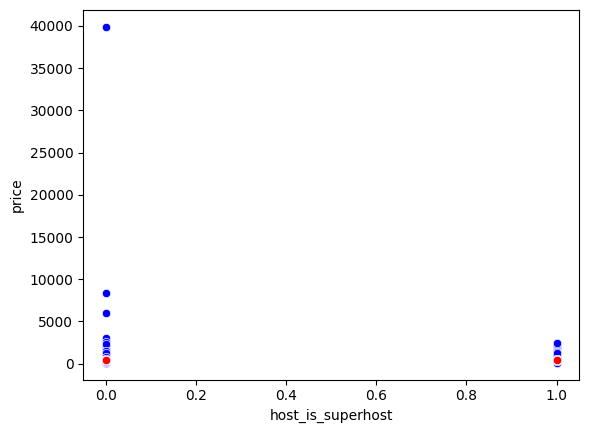

In [109]:
sns.scatterplot(x='host_is_superhost', y='price', color="blue", data=df1)
sns.scatterplot(x='host_is_superhost', y=y_pred3, color="red", data=df1)

In [110]:
coef_Deter3= model3.score(X=X3, y=Y3)
coef_Deter3

4.2332037675230083e-07

In [111]:
coef_Correl3= np.sqrt(coef_Deter3)
coef_Correl3

np.float64(0.0006506307530022699)

In [112]:

Y4= df1['accommodates']
X4= df1['bathrooms'].to_frame()

In [113]:
from sklearn.linear_model import LinearRegression
model4= LinearRegression()
type(model4)

sklearn.linear_model._base.LinearRegression

In [114]:
model4.fit(X=X4, y=Y4)

LinearRegression()

In [115]:
y_pred4= model4.predict(X=X4)
y_pred4

array([1.88609047, 1.88609047, 1.88609047, ..., 1.88609047, 1.88609047,
       1.88609047], shape=(1879,))

<Axes: xlabel='bathrooms', ylabel='accommodates'>

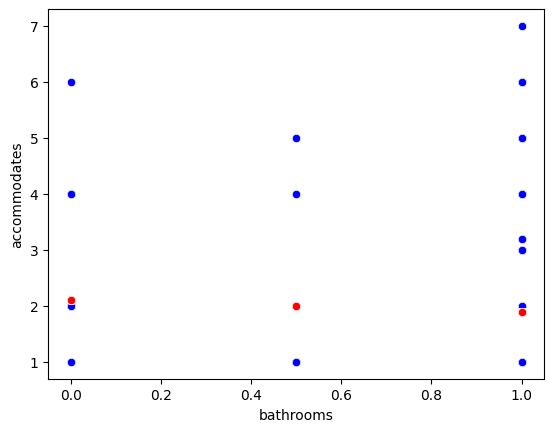

In [116]:
sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data=df1)
sns.scatterplot(x='bathrooms', y=y_pred4, color="red", data=df1)

In [117]:
coef_Deter4= model4.score(X=X4, y=Y4)
coef_Deter4

0.0009596874535607869

In [118]:
coef_Correl4= np.sqrt(coef_Deter4)
coef_Correl4

np.float64(0.030978822662599475)

In [119]:

Y5= df1['price']
X5= df1['review_scores_cleanliness'].to_frame()

In [120]:
from sklearn.linear_model import LinearRegression
model5= LinearRegression()
type(model5)

sklearn.linear_model._base.LinearRegression

In [121]:
model5.fit(X=X5, y=Y5)

LinearRegression()

In [122]:
y_pred5= model5.predict(X=X5)
y_pred5

array([475.18340238, 484.36554925, 478.31367973, ..., 481.86132738,
       481.86132738, 481.86132738], shape=(1879,))

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

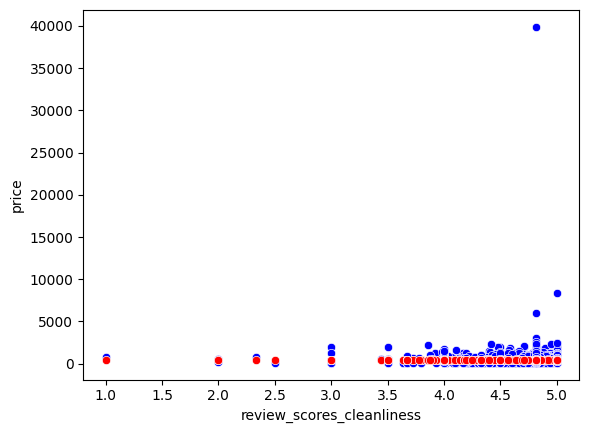

In [123]:
sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data=df1)
sns.scatterplot(x='review_scores_cleanliness', y=y_pred5, color="red", data=df1)

In [124]:
coef_Deter5= model5.score(X=X5, y=Y5)
coef_Deter5

4.999839841823839e-05

In [125]:
coef_Correl5= np.sqrt(coef_Deter5)
coef_Correl5

np.float64(0.007070954562026148)

In [126]:
df1['host_identity_verified'] = df1['host_identity_verified'].replace({'f': 0, 't': 1})

C:\Users\blanf\AppData\Local\Temp\ipykernel_34184\3355181784.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['host_identity_verified'] = df1['host_identity_verified'].replace({'f': 0, 't': 1})
C:\Users\blanf\AppData\Local\Temp\ipykernel_34184\3355181784.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['host_identity_verified'] = df1['host_identity_verified'].replace({'f': 0, 't': 1})


In [127]:

Y6= df1['price']
X6= df1['host_identity_verified'].to_frame()

In [128]:
from sklearn.linear_model import LinearRegression
model6= LinearRegression()
type(model6)

sklearn.linear_model._base.LinearRegression

In [129]:
model6.fit(X=X6, y=Y6)

LinearRegression()

In [130]:
y_pred6= model6.predict(X=X6)
y_pred6

array([490.46639392, 373.56547619, 490.46639392, ..., 490.46639392,
       490.46639392, 490.46639392], shape=(1879,))

<Axes: xlabel='host_identity_verified', ylabel='price'>

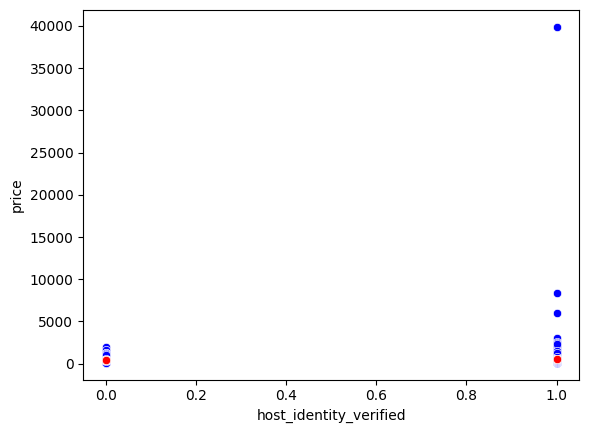

In [131]:
sns.scatterplot(x='host_identity_verified', y='price', color="blue", data=df1)
sns.scatterplot(x='host_identity_verified', y=y_pred6, color="red", data=df1)

In [132]:
coef_Deter6= model6.score(X=X6, y=Y6)
coef_Deter6

0.0010892275577216726

In [133]:
coef_Correl6= np.sqrt(coef_Deter6)
coef_Correl6

np.float64(0.03300344766417097)

In [134]:
df1['instant_bookable'] = df1['instant_bookable'].replace({'f': 0, 't': 1})

C:\Users\blanf\AppData\Local\Temp\ipykernel_34184\1876949163.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['instant_bookable'] = df1['instant_bookable'].replace({'f': 0, 't': 1})
C:\Users\blanf\AppData\Local\Temp\ipykernel_34184\1876949163.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['instant_bookable'] = df1['instant_bookable'].replace({'f': 0, 't': 1})


In [135]:

Y7= df1['price']
X7= df1['instant_bookable'].to_frame()

In [136]:
from sklearn.linear_model import LinearRegression
model7= LinearRegression()
type(model7)

sklearn.linear_model._base.LinearRegression

In [137]:
model7.fit(X=X7, y=Y7)

LinearRegression()

In [138]:
y_pred7= model7.predict(X=X7)
y_pred7

array([502.23487544, 476.10700876, 476.10700876, ..., 476.10700876,
       476.10700876, 476.10700876], shape=(1879,))

<Axes: xlabel='instant_bookable', ylabel='price'>

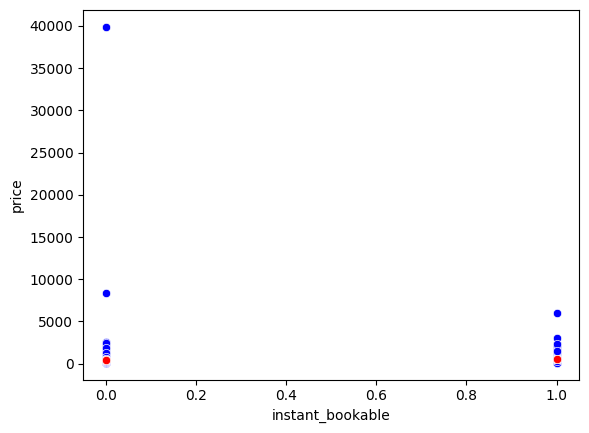

In [139]:
sns.scatterplot(x='instant_bookable', y='price', color="blue", data=df1)
sns.scatterplot(x='instant_bookable', y=y_pred7, color="red", data=df1)

In [140]:
coef_Deter7= model7.score(X=X7, y=Y7)
coef_Deter7

8.499913103154899e-05

In [141]:
coef_Correl7= np.sqrt(coef_Deter7)
coef_Correl7

np.float64(0.009219497330741464)

In [142]:
valores_unicos = df1['property_type'].unique()
valores_unicos

array(['Private room in rental unit', 'Private room in condo',
       'Private room in home', 'Private room in guest suite',
       'Private room in townhouse', 'Private room in villa',
       'Private room in guesthouse', 'Private room in bed and breakfast',
       'Private room in loft', 'Private room in serviced apartment',
       'Private room in bungalow', 'Private room in hut', 'Private room',
       'Private room in tiny home', 'Private room in boat',
       'Room in boutique hotel', 'Private room in hostel',
       'Room in hotel', 'Room in aparthotel',
       'Private room in casa particular', 'Private room in vacation home',
       'Private room in castle', 'Private room in barn',
       'Private room in cabin', 'Private room in shipping container'],
      dtype=object)

In [143]:
df1['property_type'] = df1['property_type'].replace({
    'Entire rental unit': 1,
    'Entire condo': 2,
    'Private room in rental unit': 3,
    'Entire home': 4,
    'Private room in condo': 5,
    'Entire townhouse': 6,
    'Private room in home': 7,
    'Entire villa': 8,
    'Entire loft': 9,
    'Private room in villa': 10,
    'Entire serviced apartment': 11,
    'Private room in townhouse': 12,
    'Room in hotel': 13,
    'Entire guesthouse': 14,
    'Private room in bed and breakfast': 15,
    'Room in aparthotel': 16,
    'Private room in guest suite': 17,
    'Private room in casa particular': 18,
    'Shared room in hotel': 19,
    'Private room in guesthouse': 20,
    'Tiny home': 21,
    'Shared room in hostel': 22,
    'Private room in serviced apartment': 23,
    'Private room in boat': 24,
    'Houseboat': 25,
    'Entire guest suite': 26,
    'Boat': 27,
    'Shared room in rental unit': 28,
    'Shared room in condo': 29,
    'Private room in loft': 30,
    'Private room': 31,
    'Private room in bungalow': 32,
    'Private room in hostel': 33,
    'Entire bungalow': 34,
    'Entire vacation home': 35,
    'Entire cabin': 36,
    'Private room in shipping container': 37,
    'Room in hostel': 38,
    'Camper/RV': 39,
    'Entire place': 40,
    'Barn': 41,
    'Casa particular': 42,
    'Entire cottage': 43,
    'Private room in hut': 44,
    'Shared room in bungalow': 45,
    'Private room in tiny home': 46,
    'Shared room in bed and breakfast': 47,
    'Private room in vacation home': 48,
    'Hut': 49,
    'Private room in barn': 50,
    'Minsu': 51,
    'Shipping container': 52,
    'Private room in cabin': 53,
    'Tower': 54,
    'Dome': 55,
    'Farm stay': 56,
    'Tent': 57,
    'Room in boutique hotel': 58,
    'Private room in castle': 58,

})


C:\Users\blanf\AppData\Local\Temp\ipykernel_34184\2555558956.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['property_type'] = df1['property_type'].replace({
C:\Users\blanf\AppData\Local\Temp\ipykernel_34184\2555558956.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['property_type'] = df1['property_type'].replace({


In [144]:

Y8= df1['price']
X8= df1['property_type'].to_frame()

In [145]:
df1['property_type'] = df1['property_type'].replace({...}).astype(float)

C:\Users\blanf\AppData\Local\Temp\ipykernel_34184\1373559198.py:1: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  df1['property_type'] = df1['property_type'].replace({...}).astype(float)
C:\Users\blanf\AppData\Local\Temp\ipykernel_34184\1373559198.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['property_type'] = df1['property_type'].replace({...}).astype(float)


In [146]:
from sklearn.linear_model import LinearRegression
model8= LinearRegression()
type(model8)

sklearn.linear_model._base.LinearRegression

In [147]:
model8.fit(X=X8, y=Y8)

LinearRegression()

In [148]:
y_pred8= model8.predict(X=X8)
y_pred8

array([375.15163535, 375.15163535, 461.40117668, ..., 375.15163535,
       375.15163535, 375.15163535], shape=(1879,))

<Axes: xlabel='property_type', ylabel='price'>

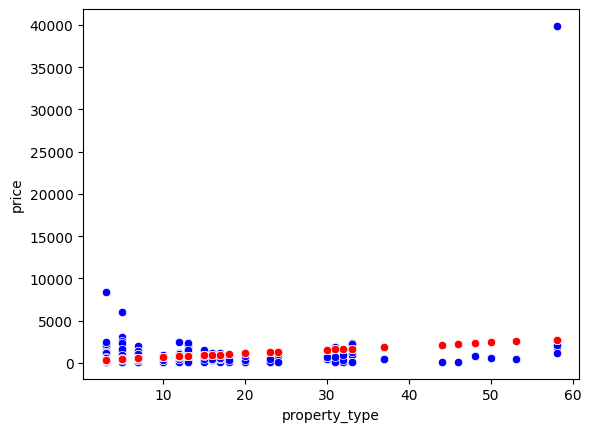

In [149]:
sns.scatterplot(x='property_type', y='price', color="blue", data=df1)
sns.scatterplot(x='property_type', y=y_pred8, color="red", data=df1)

In [150]:
coef_Deter8= model8.score(X=X8, y=Y8)
coef_Deter8

0.06083777700451709

In [151]:
coef_Correl8= np.sqrt(coef_Deter8)
coef_Correl8

np.float64(0.24665315121546105)

In [152]:
df1 = df1.drop('room_type', axis=1)

In [153]:
df1.insert(0, 'Predicción_Host_acceptance_rate', y_pred2)
df1.insert(1, 'Predicción_Host_is_superhost', y_pred3)
df1.insert(2, 'Predicción_accommodates', y_pred4)
df1.insert(3, 'Predicción_review_scores_cleanliness', y_pred5)
df1.insert(4, 'Predicción_host_identity_verified', y_pred6)
df1.insert(5, 'Predicción_instant_bookable', y_pred7)
df1.insert(6, 'Predicción_property_type', y_pred8)

In [154]:
Corr_Factors=df1.corr()
Corr_Factors

,Predicción_Host_acceptance_rate,Predicción_Host_is_superhost,Predicción_accommodates,Predicción_review_scores_cleanliness,Predicción_host_identity_verified,Predicción_instant_bookable,Predicción_property_type,price,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type
Predicción_Host_acceptance_rate,1.000000,0.323989,0.001405,-0.010939,-0.052843,-0.254129,-0.139897,0.015984,-0.010939,-1.000000,-0.052843,-0.323989,-0.254129,-0.056489,-0.001405,-0.139897
Predicción_Host_is_superhost,0.323989,1.000000,0.003836,-0.142339,-0.090216,0.007372,-0.024161,0.000651,-0.142339,-0.323989,-0.090216,-1.000000,0.007372,0.027388,-0.003836,-0.024161
Predicción_accommodates,0.001405,0.003836,1.000000,-0.033252,-0.015683,0.033599,0.146261,0.135074,-0.033252,-0.001405,-0.015683,-0.003836,0.033599,0.030979,-1.000000,0.146261
Predicción_review_scores_cleanliness,-0.010939,-0.142339,-0.033252,1.000000,-0.037302,-0.154090,-0.071710,0.007071,1.000000,0.010939,-0.037302,0.142339,-0.154090,-0.067651,0.033252,-0.071710
Predicción_host_identity_verified,-0.052843,-0.090216,-0.015683,-0.037302,1.000000,0.037259,0.052114,0.033003,-0.037302,0.052843,1.000000,0.090216,0.037259,0.017896,0.015683,0.052114
Predicción_instant_bookable,-0.254129,0.007372,0.033599,-0.154090,0.037259,1.000000,0.221944,0.009219,-0.154090,0.254129,0.037259,-0.007372,1.000000,0.051027,-0.033599,0.221944
Predicción_property_type,-0.139897,-0.024161,0.146261,-0.071710,0.052114,0.221944,1.000000,0.246653,-0.071710,0.139897,0.052114,0.024161,0.221944,0.117116,-0.146261,1.000000
price,0.015984,0.000651,0.135074,0.007071,0.033003,0.009219,0.246653,1.000000,0.007071,-0.015984,0.033003,-0.000651,0.009219,0.071804,-0.135074,0.246653
review_scores_cleanliness,-0.010939,-0.142339,-0.033252,1.000000,-0.037302,-0.154090,-0.071710,0.007071,1.000000,0.010939,-0.037302,0.142339,-0.154090,-0.067651,0.033252,-0.071710
host_acceptance_rate,-1.000000,-0.323989,-0.001405,0.010939,0.052843,0.254129,0.139897,-0.015984,0.010939,1.000000,0.052843,0.323989,0.254129,0.056489,0.001405,0.139897


In [155]:
#Convierte todo a positivo :(
Corr_Factors1=abs(Corr_Factors)
Corr_Factors1

,Predicción_Host_acceptance_rate,Predicción_Host_is_superhost,Predicción_accommodates,Predicción_review_scores_cleanliness,Predicción_host_identity_verified,Predicción_instant_bookable,Predicción_property_type,price,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type
Predicción_Host_acceptance_rate,1.000000,0.323989,0.001405,0.010939,0.052843,0.254129,0.139897,0.015984,0.010939,1.000000,0.052843,0.323989,0.254129,0.056489,0.001405,0.139897
Predicción_Host_is_superhost,0.323989,1.000000,0.003836,0.142339,0.090216,0.007372,0.024161,0.000651,0.142339,0.323989,0.090216,1.000000,0.007372,0.027388,0.003836,0.024161
Predicción_accommodates,0.001405,0.003836,1.000000,0.033252,0.015683,0.033599,0.146261,0.135074,0.033252,0.001405,0.015683,0.003836,0.033599,0.030979,1.000000,0.146261
Predicción_review_scores_cleanliness,0.010939,0.142339,0.033252,1.000000,0.037302,0.154090,0.071710,0.007071,1.000000,0.010939,0.037302,0.142339,0.154090,0.067651,0.033252,0.071710
Predicción_host_identity_verified,0.052843,0.090216,0.015683,0.037302,1.000000,0.037259,0.052114,0.033003,0.037302,0.052843,1.000000,0.090216,0.037259,0.017896,0.015683,0.052114
Predicción_instant_bookable,0.254129,0.007372,0.033599,0.154090,0.037259,1.000000,0.221944,0.009219,0.154090,0.254129,0.037259,0.007372,1.000000,0.051027,0.033599,0.221944
Predicción_property_type,0.139897,0.024161,0.146261,0.071710,0.052114,0.221944,1.000000,0.246653,0.071710,0.139897,0.052114,0.024161,0.221944,0.117116,0.146261,1.000000
price,0.015984,0.000651,0.135074,0.007071,0.033003,0.009219,0.246653,1.000000,0.007071,0.015984,0.033003,0.000651,0.009219,0.071804,0.135074,0.246653
review_scores_cleanliness,0.010939,0.142339,0.033252,1.000000,0.037302,0.154090,0.071710,0.007071,1.000000,0.010939,0.037302,0.142339,0.154090,0.067651,0.033252,0.071710
host_acceptance_rate,1.000000,0.323989,0.001405,0.010939,0.052843,0.254129,0.139897,0.015984,0.010939,1.000000,0.052843,0.323989,0.254129,0.056489,0.001405,0.139897


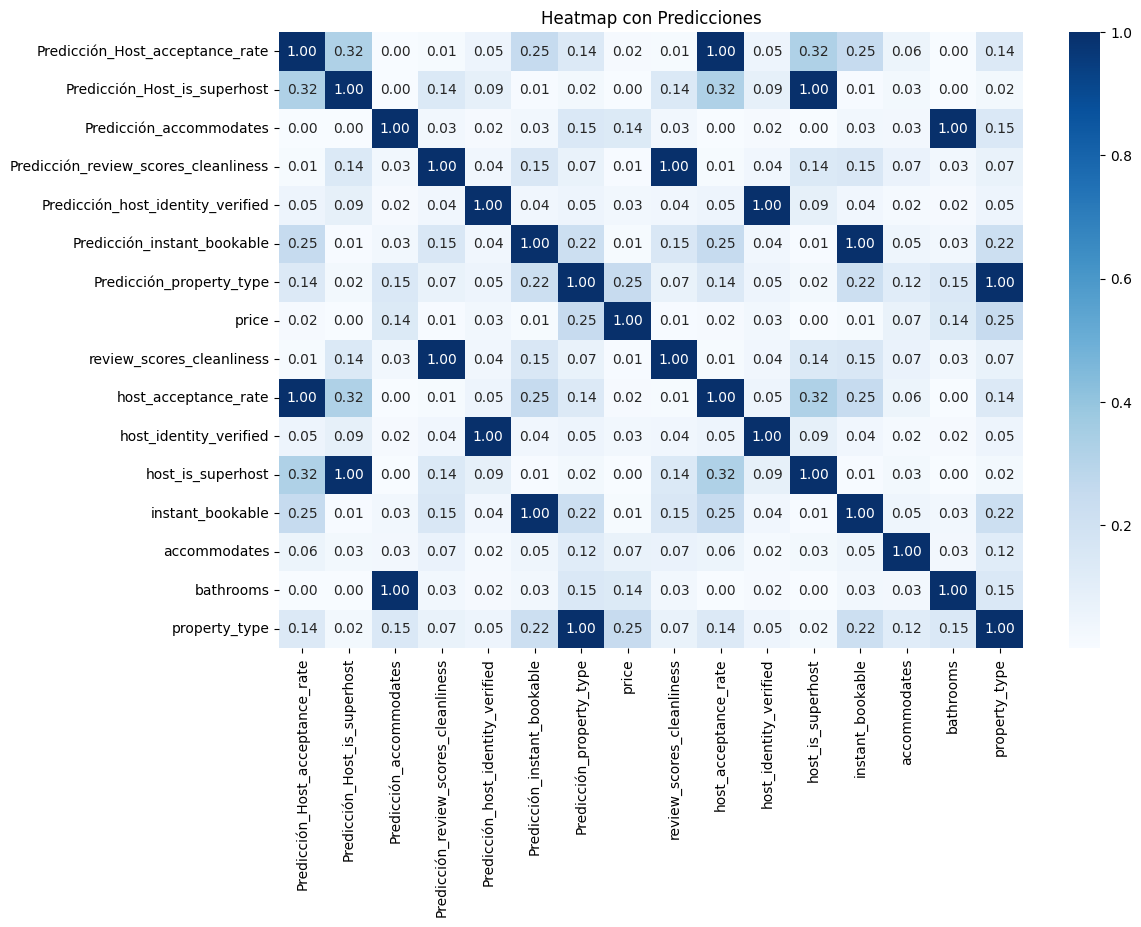

In [156]:
plt.figure(figsize=(12,8))
sns.heatmap(Corr_Factors1, cmap='Blues', annot=True, fmt=".2f")
plt.title("Heatmap con Predicciones")
plt.show()
